In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle 

In [2]:
df_partidos = pd.read_csv('../data/df_partidos.csv', index_col=0)

In [3]:
# Dummies
df_dummies = pd.get_dummies(df_partidos[["home_team", "away_team"]])
df_partidos_dummies=df_partidos.join(df_dummies)

In [4]:
# Separar en train y test
df_train = df_partidos_dummies.iloc[:2659,7:]
df_test = df_partidos_dummies.iloc[2659:,7:]

In [5]:
# Separar en X e y
X_train=df_train.drop('result', axis=1)
y_train=df_train['result']
X_test=df_test.drop('result', axis=1)
y_test=df_test['result']

In [6]:
# Cargar modelo
with open('../modelos/gbc_model', "rb") as archivo_entrada:
    my_model = pickle.load(archivo_entrada)    

In [7]:
# Entrenamiento del modelo
my_model.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy Score 0.55 
 --------------------------------------------------
Confusion Matrix 
 [[  2  71  19]
 [  4 168  12]
 [  0  67  38]] 
 --------------------------------------------------


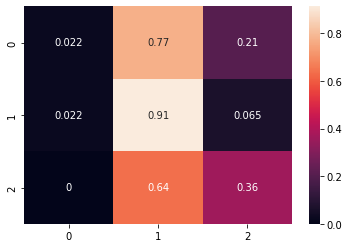

In [8]:
# Predicción
y_pred = my_model.predict(X_test)

print('Accuracy Score', round(accuracy_score(y_test, y_pred),2), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

In [9]:
# # Guardar modelo
# with open('../modelos/gbc_model_2', "wb") as archivo_salida:
#     pickle.dump(my_model, archivo_salida)